# 基本自编码器

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# 读取数据
(x_train,_),(x_test,_)=tf.keras.datasets.mnist.load_data()
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
# 修改数据shape
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [4]:
# 修改数据类型
x_train=tf.cast(x_train,tf.float32)/255
x_test=tf.cast(x_test,tf.float32)/255
x_train.shape,x_test.shape

(TensorShape([60000, 784]), TensorShape([10000, 784]))

In [5]:
input_size=x_train.shape[-1]  # 784
hidden_size=32
output_size=input_size

In [6]:
input=tf.keras.layers.Input(shape=(input_size,))

# encode
en=tf.keras.layers.Dense(hidden_size,activation='relu')(input)

# decode
de=tf.keras.layers.Dense(output_size,activation='sigmoid')(en)

model=tf.keras.Model(inputs=input,outputs=de)

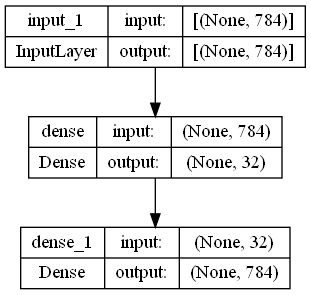

In [7]:
# 展示模型流程图
tf.keras.utils.plot_model(model,show_shapes=True)

In [8]:
# 展示模型参数
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',loss='mse')
model.fit(x_train,x_train,epochs=50,
          batch_size=256,shuffle=True,
          validation_data=(x_test,x_test))

Epoch 1/50
235/235 [==============================] - 4s 5ms/step - loss: 0.0703 - val_loss: 0.0408
Epoch 2/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0347 - val_loss: 0.0290
Epoch 3/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0260 - val_loss: 0.0230
Epoch 4/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0214 - val_loss: 0.0192
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0182 - val_loss: 0.0167
Epoch 6/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0160 - val_loss: 0.0148
Epoch 7/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0145 - val_loss: 0.0134
Epoch 8/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0133 - val_loss: 0.0124
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0124 - val_loss: 0.0117
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0117 - val_loss: 0.0112

In [11]:
# test的encode建立
encode=tf.keras.Model(inputs=input,outputs=en)
# test的decode建立
input_de=tf.keras.layers.Input(shape=(hidden_size,))
output=model.layers[-1](input_de)
decode=tf.keras.Model(inputs=input_de,outputs=output)

In [12]:
encode_test=encode(x_test)
decode_test=decode.predict(encode_test)

313/313 [==============================] - 0s 558us/step


In [13]:
decode_test.shape
x_test=x_test.numpy()
n=10

(10000, 784)

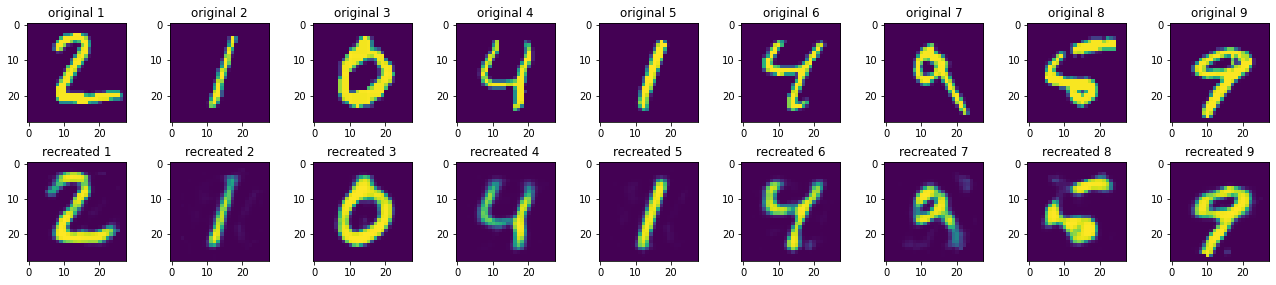

In [17]:
plt.figure(figsize=(20,4))
for i in range(1,n):
    # 展示原始图像
    ax=plt.subplot(2,n,i)
    plt.imshow(x_test[i].reshape(28,28))
    plt.title('original '+str(i))
    # 展示自编码器重构后的图像
    ax=plt.subplot(2,n,n+i)
    plt.title('recreated '+str(i))
    plt.imshow(decode_test[i].reshape(28,28))
plt.tight_layout()
plt.show()

"输入随机数进行GAN生成新图像"

1/1 [==============================] - 0s 12ms/step


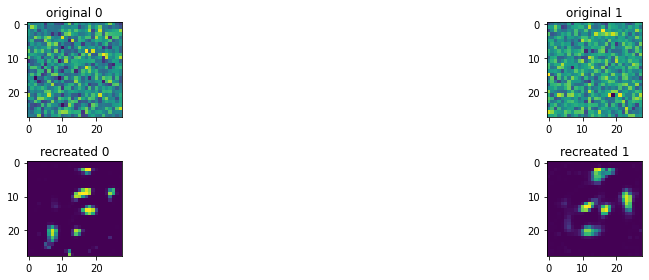

In [24]:
import numpy as np
n=2
x_test=np.random.randn(2,28*28)
# test生成
encode_test=encode(x_test)
decode_test=decode.predict(encode_test)

plt.figure(figsize=(20,4))
for i in range(0,n):
    # 展示原始图像
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.title('original '+str(i))
    # 展示自编码器重构后的图像
    ax=plt.subplot(2,n,i+1+n)
    plt.title('recreated '+str(i))
    plt.imshow(decode_test[i].reshape(28,28))
plt.tight_layout()
plt.show()

# 基本去噪自编码器——test和train加入噪声

In [31]:
# 读取数据
(x_train,_),(x_test,_)=tf.keras.datasets.mnist.load_data()

# 修改数据shape
x_train=x_train.reshape(x_train.shape[0],-1)
x_test=x_test.reshape(x_test.shape[0],-1)

# 修改数据类型
x_train=tf.cast(x_train,tf.float32)/255
x_test=tf.cast(x_test,tf.float32)/255

factor=0.5
x_train_noise=x_train+factor*np.random.normal(size=x_train.shape)
x_test_noise=x_test+factor*np.random.normal(size=x_test.shape)

# 裁剪归一化
x_train_noise=np.clip(x_train_noise,0.,1.) # x_train_noise.clip(0.,1.)
x_test_noise=np.clip(x_test_noise,0.,1.) # x_test_noise.clip(0.,1.)

# train
model.compile(optimizer='adam',loss='mse')
model.fit(x_train_noise,x_train_noise,epochs=50,
          batch_size=256,shuffle=True,
          validation_data=(x_test_noise,x_test_noise))

# test
encode_test_noise=encode(x_test_noise)
decode_test_noise=decode.predict(encode_test_noise)

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.0831 - val_loss: 0.0830
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0830 - val_loss: 0.0830
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0830 - val_loss: 0.0830
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0830 - val_loss: 0.0830
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0830 - val_loss: 0.0830
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0830 - val_loss: 0.0830
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0830 - val_loss: 0.0830
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0830 - val_loss: 0.0830
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0830 - val_loss: 0.0830
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0830 - val_loss: 0.

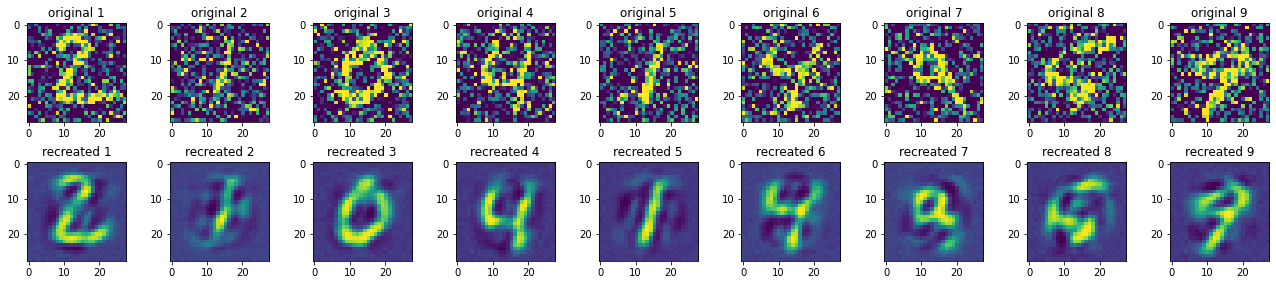

In [34]:
# 画图
n=10
plt.figure(figsize=(20,4))
for i in range(1,n):
    # 展示原始图像
    ax=plt.subplot(2,n,i)
    plt.imshow(x_test_noise[i].reshape(28,28))
    plt.title('original '+str(i))
    # 展示自编码器重构后的图像
    ax=plt.subplot(2,n,n+i)
    plt.title('recreated '+str(i))
    plt.imshow(decode_test_noise[i].reshape(28,28))
plt.tight_layout()
plt.show()

# 反卷积去噪自编码器-可直接运行

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# 读取数据
(x_train,_),(x_test,_)=tf.keras.datasets.mnist.load_data()

# 修改数据shape
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

# 修改数据类型
x_train=tf.cast(x_train,tf.float32)/255
x_test=tf.cast(x_test,tf.float32)/255

factor=0.5
x_train_noise=x_train+factor*np.random.normal(size=x_train.shape)
x_test_noise=x_test+factor*np.random.normal(size=x_test.shape)

# 裁剪归一化
x_train_noise=np.clip(x_train_noise,0.,1.) # x_train_noise.clip(0.,1.)
x_test_noise=np.clip(x_test_noise,0.,1.) # x_test_noise.clip(0.,1.)

# train

input=tf.keras.layers.Input(shape=(x_train_noise.shape[1:]))

# encode
x=tf.keras.layers.Conv2D(16, # 16是输出通道数
                          [3,3], # 3是卷积核大小
                         activation='relu',padding='same')(input)  
x=tf.keras.layers.MaxPooling2D(padding='same')(x)
x=tf.keras.layers.Conv2D(32,[3,3],activation='relu',padding='same')(x)  
en=tf.keras.layers.MaxPooling2D(padding='same')(x)  # size=(7,7,14)
# decode
de=tf.keras.layers.Conv2DTranspose(16,[3,3], 
                                   strides=2,
                                   activation='relu',padding='same')(en) # 反卷积
de=tf.keras.layers.Conv2DTranspose(1,[3,3],
                                   strides=2,
                                   activation='sigmoid',padding='same')(de) # (28,28,1) 
model=tf.keras.Model(inputs=input,outputs=de)
# print(model.summary())

In [3]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='mse')

In [5]:
# train
model.fit(x_train_noise,x_train,epochs=50,
          batch_size=128,shuffle=True,
          validation_data=(x_test_noise,x_test))

Epoch 1/50
469/469 [==============================] - 3s 5ms/step - loss: 0.0167 - val_loss: 0.0162
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0164 - val_loss: 0.0159
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0161 - val_loss: 0.0156
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0158 - val_loss: 0.0153
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0155 - val_loss: 0.0151
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0152 - val_loss: 0.0148
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0150 - val_loss: 0.0145
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0147 - val_loss: 0.0144
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0145 - val_loss: 0.0141
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0143 - val_loss: 0.0140

In [6]:
pre_test=model.predict(x_test_noise)

313/313 [==============================] - 1s 991us/step


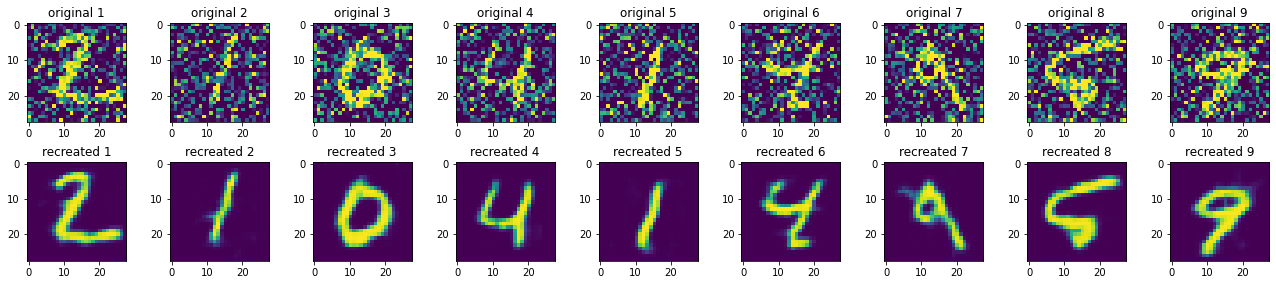

In [7]:
# 画图
n=10
plt.figure(figsize=(20,4))
for i in range(1,n):
    # 展示原始图像
    ax=plt.subplot(2,n,i)
    plt.imshow(x_test_noise[i].reshape(28,28))
    plt.title('original '+str(i))
    # 展示自编码器重构后的图像
    ax=plt.subplot(2,n,n+i)
    plt.title('recreated '+str(i))
    plt.imshow(pre_test[i].reshape(28,28))
plt.tight_layout()
plt.show()